# Regressão - California Housing

Dataset: California Housing

Descrição das variáveis:

*   Id - Id única de cada local
*   latitude- latitude do local
*   longitude- longitude do local
*   median_age- mediana das idades das casas no local
*   total_rooms - contagem do total de cômodos na região
*   total_bedrooms - contagem do total de quartos na região
*   population - população total na região
*   households - número total de casas na região
*   median_income- mediana da renda das pessoas na região
*   median_house_value -mediana dos valores das casas da região

## 1. Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


## 2. Importar os dados

In [ ]:
#dados de treino
df_train = pd.read_csv('train.csv')

#dados de teste
df_test = pd.read_csv('test.csv')

In [ ]:
#primeiras linhas do dataset de treino
df_train.head()

,Id,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15817,-120.85,37.57,27,819,157,451,150,34934,193800
1,6236,-117.74,34.06,48,2438,599,1508,548,28983,129200
2,19262,-118.11,33.92,32,1016,190,729,177,43000,151300
3,19743,-118.12,34.15,35,1760,447,984,384,34167,198200
4,7272,-120.63,37.41,27,2083,444,1462,479,26439,69100


In [ ]:
#dimensão dos dados
df_train.shape

(14448, 10)

### Index column

In [ ]:
#estamos transformando a variável "Id" no índice das linhas

df_train.set_index("Id", inplace=True)

In [ ]:
df_train.head()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
Id,,,,,,,,,
15817,-120.85,37.57,27,819,157,451,150,34934,193800
6236,-117.74,34.06,48,2438,599,1508,548,28983,129200
19262,-118.11,33.92,32,1016,190,729,177,43000,151300
19743,-118.12,34.15,35,1760,447,984,384,34167,198200
7272,-120.63,37.41,27,2083,444,1462,479,26439,69100


## 3. Explorar os dados


In [ ]:
#informações gerais
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 15817 to 9756
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   median_age          14448 non-null  int64  
 3   total_rooms         14448 non-null  int64  
 4   total_bedrooms      14448 non-null  int64  
 5   population          14448 non-null  int64  
 6   households          14448 non-null  int64  
 7   median_income       14448 non-null  int64  
 8   median_house_value  14448 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.1 MB


In [ ]:
#confirmando que não há valores faltantes
df_train.isnull().sum()

longitude             0
latitude              0
median_age            0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Esse conjunto de dados não possui valores faltantes.

Caso houvessem valores faltantes, estes poderiam ser removidos ou utilizado alguma técnica para substituí-los (imputação de dados).

In [ ]:
#verificar duplicatas nos dados
df_train.duplicated().sum()

0

Como nosso resultado foi 0, significa que todos os valores foram FALSE, sendo assim o conjunto de dados limpo de duplicações.

In [ ]:
#descrições estatísticas básicas dos dados
df_train.describe()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.563050,35.625804,28.700028,2622.627284,535.628391,1413.978405,496.934109,38747.577450,207556.603267
std,2.008096,2.138690,12.587508,2145.423570,416.800426,1095.060629,376.873380,19091.513037,116441.436255
min,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,4999.000000,14999.000000
25%,-121.790000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,25596.500000,119300.000000
50%,-118.490000,34.250000,29.000000,2116.000000,432.000000,1160.000000,407.000000,35334.000000,179950.000000
75%,-118.000000,37.710000,37.000000,3131.250000,645.250000,1705.000000,602.000000,47500.000000,266100.000000
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,150001.000000,500001.000000


### Análise das features





In [ ]:
df_train.corr()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924038,-0.108722,0.039412,0.061997,0.091558,0.046091,-0.014650,-0.044062
latitude,-0.924038,1.000000,0.014320,-0.033607,-0.062063,-0.104018,-0.065010,-0.083089,-0.147024
median_age,-0.108722,0.014320,1.000000,-0.363453,-0.320720,-0.300629,-0.302986,-0.125571,0.099341
total_rooms,0.039412,-0.033607,-0.363453,1.000000,0.927056,0.859914,0.913999,0.199281,0.139242
total_bedrooms,0.061997,-0.062063,-0.320720,0.927056,1.000000,0.881080,0.978051,-0.009742,0.055533
population,0.091558,-0.104018,-0.300629,0.859914,0.881080,1.000000,0.911964,0.006025,-0.020434
households,0.046091,-0.065010,-0.302986,0.913999,0.978051,0.911964,1.000000,0.012455,0.071622
median_income,-0.014650,-0.083089,-0.125571,0.199281,-0.009742,0.006025,0.012455,1.000000,0.687604
median_house_value,-0.044062,-0.147024,0.099341,0.139242,0.055533,-0.020434,0.071622,0.687604,1.000000


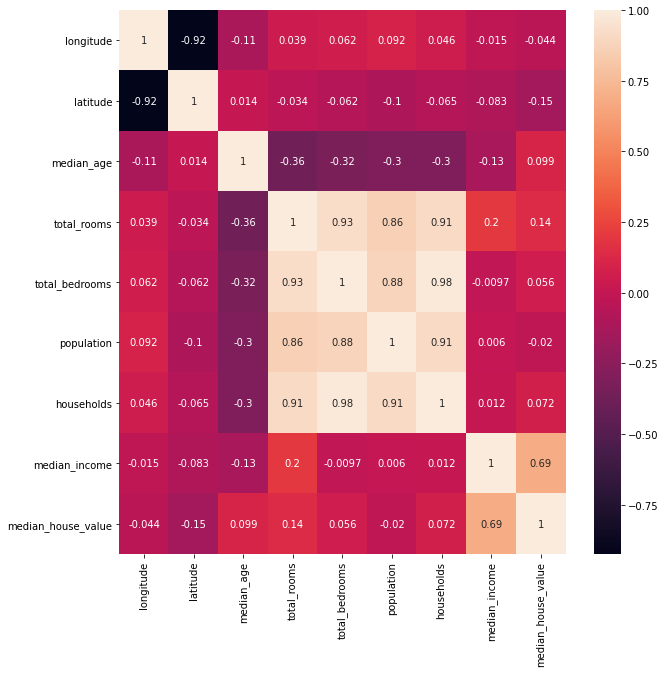

In [ ]:
#matriz de correlação entre as variáveis
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True)

Podemos observar que a variável median_income é a que possui maior correlação com nossa variável alvo, median_house_value. <br>
A latitude e longitude são as variáveis que sozinhas não possuem tanta correlação com nossa variável alvo, então vamos trabalhar mais nelas.




In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756180 sha256=f7edd2d92f1085dec0e0854775544f9a9bab7833de2ff17e8750ae25eee44c16
  Stored in directory: /tmp/pip-ephem-wheel-cache-x4f6o8mj/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [ ]:
# para ver mais sobre acesse o link: https://medium.com/lejoaoconte/plotando-dados-em-mapas-com-python-e-matplotlib-basemap-toolkit-fc99add65722

#biblioteca para visualização de mapas a partir dos pontos de longitude e latitude

from mpl_toolkits.basemap import Basemap

In [ ]:
def plot_map(lat1, lat2, lon1, lon2, xmap, ymap):
  plt.figure(figsize = (xmap, ymap))
  map = Basemap(projection = 'cyl', resolution = 'h',
                llcrnrlat = lat1, urcrnrlat = lat2,
                llcrnrlon = lon1, urcrnrlon = lon2)
  map.drawcoastlines()
  map.fillcontinents(color = 'palegoldenrod', lake_color = 'lightskyblue')
  map.drawmapboundary(fill_color = 'lightskyblue')
  map.drawparallels(np.arange(lat1, lat2 + 0.5, 2), labels=[1, 0, 0, 0])
  map.drawmeridians(np.arange(lon1, lon2 + 0.5, 2), labels=[0, 0, 0, 1])
  return map


In [ ]:
multiplot = 0.05

lat1 = df_train['latitude'].min() - multiplot if df_train['latitude'].min() < 0 else df_train['latitude'].min() + multiplot
lat2 = df_train['latitude'].max() - multiplot if df_train['latitude'].max() < 0 else df_train['latitude'].max() + multiplot

lon1 = df_train['longitude'].min() - multiplot if df_train['longitude'].min() < 0 else df_train['longitude'].min() + multiplot
lon2 = df_train['longitude'].max() - multiplot if df_train['longitude'].max() < 0 else df_train['longitude'].max() + multiplot

lat1, lat2 = round(lat1, 4), round(lat2, 4)
lon1, lon2 = round(lon1, 4), round(lon2, 4)


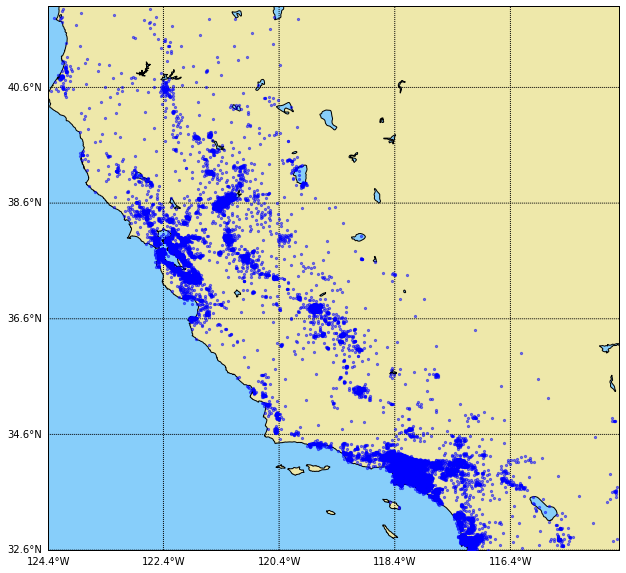

In [ ]:
map = plot_map(lat1, lat2, lon1, lon2, 15, 10)
map.scatter(df_train['longitude'].values, df_train['latitude'].values, s = 5, c = 'blue', alpha = 0.5, zorder = 5)

<Figure size 720x504 with 0 Axes>

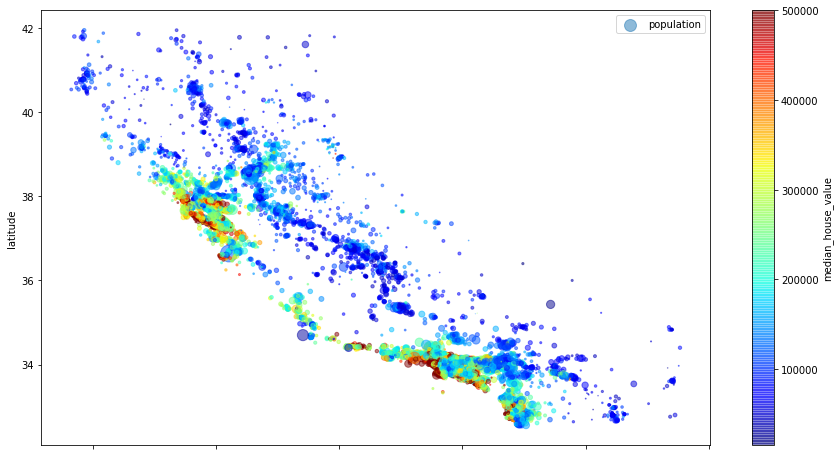

In [ ]:
plt.figure(figsize=(10,7))

df_train.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.5, s= df_train["population"]/100, label = "population", figsize=(15,8), 
              c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

Os mapas nos mostram que a média de valores das casas localizadas perto do oceano são maiores e que há uma alta densidade da população nestas mesmas regiões.



In [ ]:
# para saber mais sobre acesse o link: https://geopy.readthedocs.io/en/stable/#module-geopy.distance

import geopy
from geopy import distance

In [ ]:
#localização oceano (ao pesquisar no Google Maps obtemos "Oceano Pacífico Norte", próximo de onde fica a costa da Califórnia)

print(df_train[['latitude', 'longitude']].min()) 


latitude      32.55
longitude   -124.35
dtype: float64


In [ ]:
#função para calcular a distância dos pontos até o ponto definido como sendo oceano

def dist_ocean(df):
    a = (df["latitude"], df["longitude"])
    df["dist_to_ocean"] = (distance.distance(a, (32.55, -124.35)).km)
    
    return df

In [ ]:
df_train = df_train.apply(dist_ocean, axis = 1)
df_train = df_train.drop(["latitude", "longitude"], axis = 1)

In [ ]:
df_train.head()

,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,dist_to_ocean
Id,,,,,,,,
15817,27.0,819.0,157.0,451.0,150.0,34934.0,193800.0,641.820626
6236,48.0,2438.0,599.0,1508.0,548.0,28983.0,129200.0,637.827071
19262,32.0,1016.0,190.0,729.0,177.0,43000.0,151300.0,601.003477
19743,35.0,1760.0,447.0,984.0,384.0,34167.0,198200.0,606.324256
7272,27.0,2083.0,444.0,1462.0,479.0,26439.0,69100.0,637.102341


Agora temos outras features para trabalhar. Estas variáveis (households, population, total_bedrooms, total_rooms) possuem entre si uma alta correlação, mas com as outras baixa. Podemos juntá-las para criar novas variáveis.


In [ ]:
df_train['hh_people'] = df_train['population'] / df_train['households']

In [ ]:
df_train['hh_bedrooms'] = df_train['total_bedrooms'] / df_train['households']

In [ ]:
df_train['hh_rooms'] = df_train['total_rooms'] / df_train['households']

In [ ]:
df_train['bed_rooms'] = df_train['total_bedrooms'] / df_train['total_rooms']

In [ ]:
df_train.head()

,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,dist_to_ocean,hh_people,hh_bedrooms,hh_rooms,bed_rooms
Id,,,,,,,,,,,,
15817,27.0,819.0,157.0,451.0,150.0,34934.0,193800.0,641.820626,3.006667,1.046667,5.460000,0.191697
6236,48.0,2438.0,599.0,1508.0,548.0,28983.0,129200.0,637.827071,2.751825,1.093066,4.448905,0.245693
19262,32.0,1016.0,190.0,729.0,177.0,43000.0,151300.0,601.003477,4.118644,1.073446,5.740113,0.187008
19743,35.0,1760.0,447.0,984.0,384.0,34167.0,198200.0,606.324256,2.562500,1.164062,4.583333,0.253977
7272,27.0,2083.0,444.0,1462.0,479.0,26439.0,69100.0,637.102341,3.052192,0.926931,4.348643,0.213154


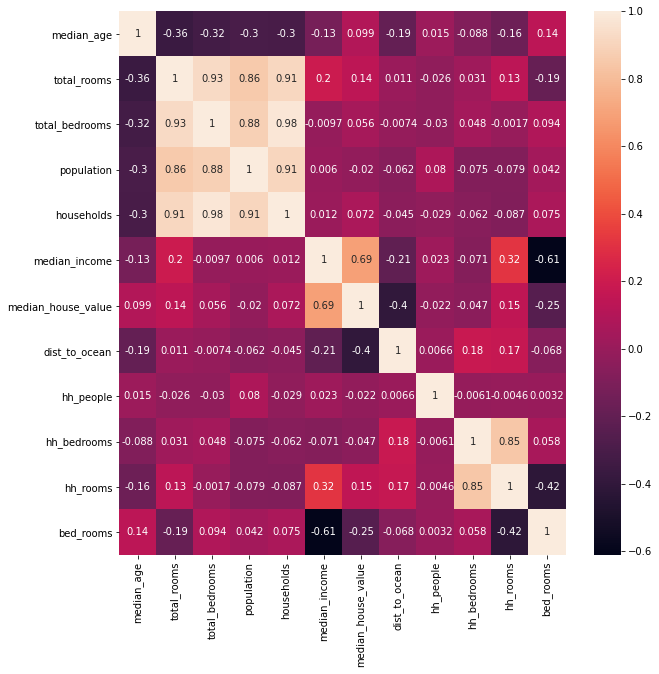

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True)

In [ ]:
df_train = df_train.drop(["hh_bedrooms", "hh_people"], axis = 1)

In [ ]:
#visualizar melhor a relação entre as váriaveis

sns.set()
sns.set_context("paper")
sns.pairplot(df_train)

Agora vamos aplicar as mesmas etapas anteriores no conjunto de teste.

In [ ]:
#dimensão do conjunto de dados de teste

df_test.shape

(6192, 9)

In [ ]:
#primeiras linhas dos dados

df_test.head()

,Id,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income
0,8609,-118.67,34.30,5,6123,825,2440,736,79013
1,14610,-117.66,34.09,26,1151,200,593,188,36667
2,1557,-118.93,35.37,34,2412,446,1558,421,26903
3,12875,-117.23,34.14,16,2577,521,956,472,25625
4,17821,-121.06,38.98,14,2267,355,1140,369,47019


In [ ]:
#estamos transformando a variável "Id" no índice das linhas

df_test.set_index("Id", inplace=True)

In [ ]:
#como ficou após a transformação

df_test.head()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income
Id,,,,,,,,
8609,-118.67,34.30,5,6123,825,2440,736,79013
14610,-117.66,34.09,26,1151,200,593,188,36667
1557,-118.93,35.37,34,2412,446,1558,421,26903
12875,-117.23,34.14,16,2577,521,956,472,25625
17821,-121.06,38.98,14,2267,355,1140,369,47019


In [ ]:
df_test = df_test.apply(dist_ocean, axis = 1)
df_test = df_test.drop(["latitude", "longitude"], axis = 1)

In [ ]:
df_test['hh_people'] = df_test['population'] / df_test['households']
df_test['hh_bedrooms'] = df_test['total_bedrooms'] / df_test['households']
df_test['hh_rooms'] = df_test['total_rooms'] / df_test['households']
df_test['bed_rooms'] = df_test['total_bedrooms'] / df_test['total_rooms']

In [ ]:
df_test.head()

,median_age,total_rooms,total_bedrooms,population,households,median_income,dist_to_ocean,hh_people,hh_bedrooms,hh_rooms,bed_rooms
Id,,,,,,,,,,,
8609,5.0,6123.0,825.0,2440.0,736.0,79013.0,562.678349,3.315217,1.120924,8.319293,0.134738
14610,26.0,1151.0,200.0,593.0,188.0,36667.0,645.782356,3.154255,1.063830,6.122340,0.173762
1557,34.0,2412.0,446.0,1558.0,421.0,26903.0,590.445871,3.700713,1.059382,5.729216,0.184909
12875,16.0,2577.0,521.0,956.0,472.0,25625.0,685.672669,2.025424,1.103814,5.459746,0.202173
17821,14.0,2267.0,355.0,1140.0,369.0,47019.0,772.830813,3.089431,0.962060,6.143631,0.156595


In [ ]:
df_test = df_test.drop(["hh_bedrooms", "hh_people"], axis = 1)

#4. Pré-processamento

In [ ]:
#dados treino

y_train = df_train.pop('median_house_value')
X = df_train

from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X)

#separar os dados para validação

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=1)

KeyError: ignored

In [ ]:
#dados de teste

X_tt = df_test

X_test = StandardScaler().fit_transform(X_tt)

#5. Modelos de Regressão

Antes de iniciarmos as aplicações dos modelos, aqui defino qual métrica a ser utilizada para avaliar os modelos de regressão: RMSE, onde os menores valores são melhores. Abaixo a fórmula utilizada pela métrica:

**Root Mean Squared Error** (RMSE) é a raíz quadrada da média dos erros quadrados:
$$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

Para entender melhor qual métrica a se utilizar recomendo este link:
https://towardsdatascience.com/which-evaluation-metric-should-you-use-in-machine-learning-regression-problems-20cdaef258e

##Treino

###Linear Regression



In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.score(X_train, y_train)

0.6263545328660765

In [ ]:
y_pred = lin_reg.predict(X_val)

In [ ]:
# calcular RMSE usando scikit-learn

from sklearn import metrics
from sklearn.metrics import mean_squared_error
print(np.sqrt(metrics.mean_squared_error(y_pred, y_val)))

71849.27206508932


###Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ran_reg = RandomForestRegressor()
ran_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
ran_reg.score(X_train, y_train)

0.9626043659779565

In [ ]:
y_pred = ran_reg.predict(X_val)

In [ ]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_pred, y_val)))

61023.704644039084


###Lasso



In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_reg.score(X_train, y_train)

0.626354511763862

In [ ]:
y_pred = lasso_reg.predict(X_val)

In [ ]:
# calcular RMSE usando scikit-learn

print(np.sqrt(metrics.mean_squared_error(y_pred, y_val)))

71849.02652024398


##Teste


O modelo que apresentou o menor valor no RMSE foi o Random Forest Regressor. Agora vamos aplicá-lo no conjunto de teste.

In [ ]:
y_pred = ran_reg.predict(X_test)

In [ ]:
y_pred

array([444793.02, 145693.  ,  90274.  , ..., 206283.  , 165510.  ,
       102873.  ])

#6. Submissão

Projeto foi submetido no Kaggle, na página da atividade da disciplina.

In [ ]:
df_submission = pd.DataFrame()

In [ ]:
df_submission['Id'] = df_test.index 

In [ ]:
df_submission['median_house_value'] = y_pred
df_submission.head()

,median_house_value,Id
0,444793.02,8609
1,145693.00,14610
2,90274.00,1557
3,146745.00,12875
4,156108.00,17821


In [ ]:
df_submission.to_csv('submission.csv', index = False)